In [60]:
import pandas as pd
a=pd.read_csv("Downloads/winequality-white.csv", sep=';')

In [61]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [62]:
a.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
#outliers
for i in range(len(a.columns)):
    if (a[a.columns[i]].dtypes in ['int64','float64']):
        print('\nAttribute-',a.columns[i],':',a[a.columns[i]].dtypes)
        Q1=a[a.columns[i]].quantile(0.25)
        print('Q1',Q1)
        Q3=a[a.columns[i]].quantile(0.75)
        print('Q3',Q3)
        IQR=Q3-Q1
        print('IQR',IQR)
        min=a[a.columns[i]].min()
        max=a[a.columns[i]].max()
        min_IQR=Q1-1.5*IQR
        max_IQR=Q3+1.5*IQR
        if (min<min_IQR):
            print('Low outlier is found')
        if (max>max_IQR):
            print('High outlier is found')


Attribute- fixed acidity : float64
Q1 6.3
Q3 7.3
IQR 1.0
Low outlier is found
High outlier is found

Attribute- volatile acidity : float64
Q1 0.21
Q3 0.32
IQR 0.11000000000000001
High outlier is found

Attribute- citric acid : float64
Q1 0.27
Q3 0.39
IQR 0.12
Low outlier is found
High outlier is found

Attribute- residual sugar : float64
Q1 1.7
Q3 9.9
IQR 8.200000000000001
High outlier is found

Attribute- chlorides : float64
Q1 0.036000000000000004
Q3 0.05
IQR 0.013999999999999999
Low outlier is found
High outlier is found

Attribute- free sulfur dioxide : float64
Q1 23.0
Q3 46.0
IQR 23.0
High outlier is found

Attribute- total sulfur dioxide : float64
Q1 108.0
Q3 167.0
IQR 59.0
Low outlier is found
High outlier is found

Attribute- density : float64
Q1 0.9917225000000001
Q3 0.9961
IQR 0.004377499999999923
High outlier is found

Attribute- pH : float64
Q1 3.09
Q3 3.28
IQR 0.18999999999999995
Low outlier is found
High outlier is found

Attribute- sulphates : float64
Q1 0.41
Q3 0.55
IQ

In [171]:
b = pd.read_csv("imports-85.data", header=None)
b.head(3)
b[b[18]=='?']

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [38]:
b[(b[21]=='?')&(b[22]=='?')]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [84]:
b[(b[2]=='bmw')&(b[16]>200)]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [43]:
b[b.columns[5:10]].head(3)

,5,6,7,8,9
0,two,convertible,rwd,front,88.6
1,two,convertible,rwd,front,88.6
2,two,hatchback,rwd,front,94.5


In [45]:
import numpy as np
b[b.columns[np.r_[6:8,25]]].head(3)

,6,7,25
0,convertible,rwd,13495
1,convertible,rwd,16500
2,hatchback,rwd,16500


In [46]:
b.iloc[0:3,5:10]

,5,6,7,8,9
0,two,convertible,rwd,front,88.6
1,two,convertible,rwd,front,88.6
2,two,hatchback,rwd,front,94.5


In [47]:
b.iloc[0:3,[6,7,25]]

,6,7,25
0,convertible,rwd,13495
1,convertible,rwd,16500
2,hatchback,rwd,16500


In [48]:
b[b[2]=='bmw']

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [49]:
b[b[2]=='bmw'].shape[0]

8

In [51]:
b[b[2]=='bmw'][9].mean()

103.1625

In [52]:
b[b[2]=='bmw'][24].max()

29

In [56]:
b[b[2]=='bmw'].agg(['mean','min','max'])

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
mean,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.1625,...,166.875,NaN,NaN,NaN,8.575,1.26376e+22,7.25073e+30,19.375,25.375,2.05377e+38
min,0.000,188,bmw,gas,std,four,sedan,rwd,front,101.2000,...,108.000,mpfi,3.31,2.80,8.000,101,4250,15.000,20.000,16430
max,2.000,?,bmw,gas,std,two,sedan,rwd,front,110.0000,...,209.000,mpfi,3.62,3.39,9.000,182,5800,23.000,29.000,41315


In [58]:
b[b[2]=='bmw'].groupby(b.columns[5]).max()

,0,1,2,3,4,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
5,,,,,,,,,,,,,,,,,,,,,
four,1,?,bmw,gas,std,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,9.0,182,5800,23,29,36880
two,2,?,bmw,gas,std,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,9.0,182,5800,23,29,41315


## Exercise 1

In [70]:
for i in range(26):
    nr=b[b[i]=='?'].shape[0]
    if nr>0:
        print(i,':',nr)

1 : 41
5 : 2
18 : 4
19 : 4
21 : 2
22 : 2
25 : 4


In [98]:
#missing value
for i in range(len(b.columns)):
    if (b[i].dtypes in ['int64','float64','object']):
        Missing_Value=sum(1 for item in b[i] if item==('?'))
        if Missing_Value>0:
            print('\nAttribute-',i,':',b[i].dtypes)
            print('Missing_Value',Missing_Value)


Attribute- 1 : object
Missing_Value 41

Attribute- 5 : object
Missing_Value 2

Attribute- 18 : object
Missing_Value 4

Attribute- 19 : object
Missing_Value 4

Attribute- 21 : object
Missing_Value 2

Attribute- 22 : object
Missing_Value 2

Attribute- 25 : object
Missing_Value 4


## Exercise 2

In [105]:
missingvalue= b[(b[1]=="?") | (b[5]=="?") | (b[18]=="?") | (b[19]=="?") | (b[21]=="?") | (b[22]=="?") | (b[25]=="?")].shape[0]
print(missingvalue)

46


In [141]:
mv = (b=='?').any(axis=1)
mv2 = sum(1 for item in mv if item==True)   
print(null_data2)

46


C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [189]:
b[(b=='?').any(axis=1)].shape[0]

46

## Exercise 3

In [130]:
b_3features=b[b.columns[np.r_[6:8,25]]] #menampilkan kolom 6-7, 25
b_3features=b_3features[b_3features[25]!='?'] #menampilkan yang bukan missing value di kolom 25
b_3features[25] = b_3features[25].astype("float64") #setting tipe data menjadi float64
b_grp=b_3features.groupby([b.columns[6],b.columns[7]]).mean() #menglompokkan kolom 6 dan 7 kemudian kolom 25 menjadi rata-rata
b_pivot=b_grp.pivot_table(index=b.columns[7],columns=b.columns[6]) #setting 6 dan 7 menjadi kolom (menjadi matiks)
b_pivot

25                                                        
6   convertible       hardtop     hatchback         sedan         wagon
7                                                                      
4wd         NaN           NaN   7603.000000  12647.333333   9095.750000
fwd     11595.0   8249.000000   8396.387755   9811.800000   9997.333333
rwd     23949.6  24202.714286  14337.777778  21711.833333  16994.222222

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

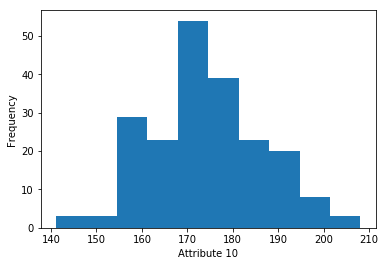

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
b[10].hist(grid=False).set(xlabel='Attribute 10', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

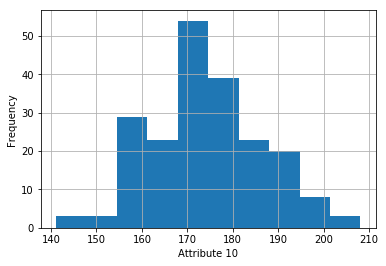

In [140]:
b[10].hist().set(xlabel='Attribute 10',ylabel='Frequency')

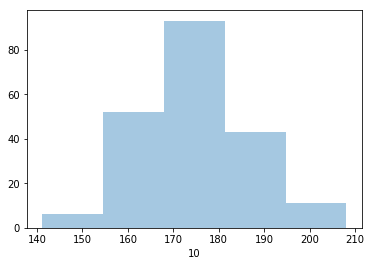

In [135]:
sns.distplot(b[10], kde=False, bins=5)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

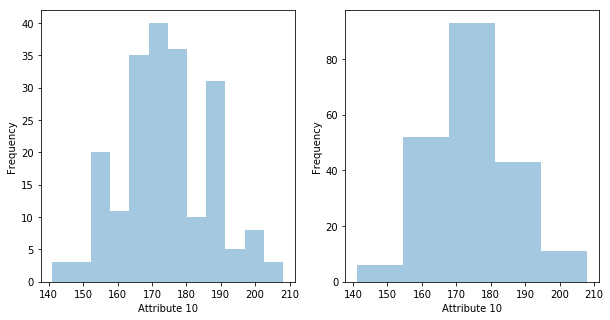

In [136]:
f, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True)
sns.distplot(b[10], kde=False, ax=axes[0]).set(xlabel='Attribute 10', ylabel='Frequency')
sns.distplot(b[10], kde=False, bins=5, ax=axes[1]).set(xlabel='Attribute 10', ylabel='Frequency')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Attribute 10')]

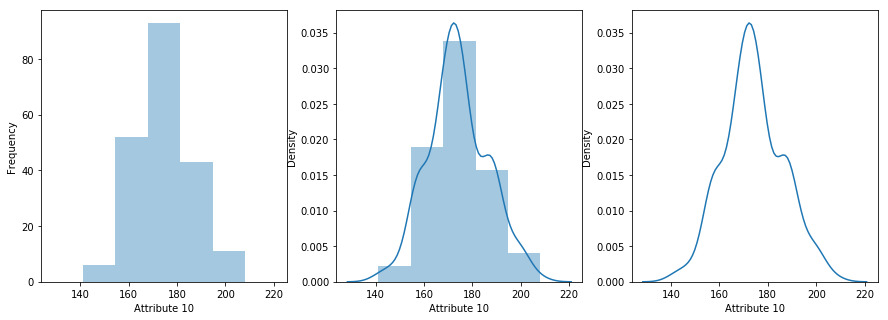

In [137]:
f, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True)
sns.distplot(b[10], kde=False, bins=5, ax=axes[0]).set(xlabel='Attribute 10', ylabel='Frequency')
sns.distplot(b[10], bins=5, ax=axes[1]).set(xlabel='Attribute 10', ylabel='Density')
sns.distplot(b[10], bins=5, hist=False, ax=axes[2]).set(xlabel='Attribute 10', ylabel='Density')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 6')]

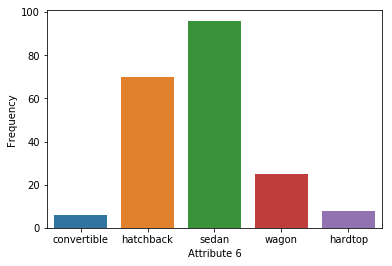

In [142]:
sns.countplot(b[6]).set(xlabel='Attribute 6', ylabel='Frequency')

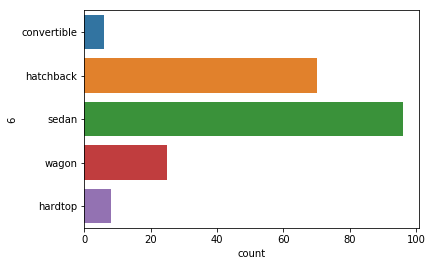

In [144]:
sns.countplot(y=b[6])

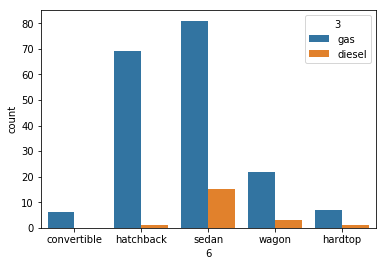

In [146]:
sns.countplot(x=b[6],hue=b[3])

## Exercise 4: Histogram for Price

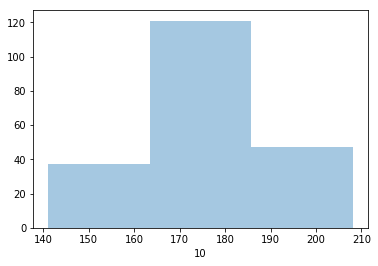

In [178]:
dataprice=b[b[25]!='?'][25]
dataprice2=dataprice.astype('float64')
sns.distplot(b[10], kde=False, bins=3)


Text(0.5, 1.0, 'basic plot')

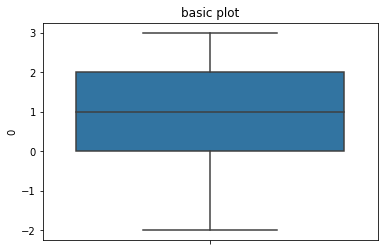

In [179]:
sns.boxplot(y=b[0]).set_title('basic plot')

Text(0.5, 1.0, 'horizontal')

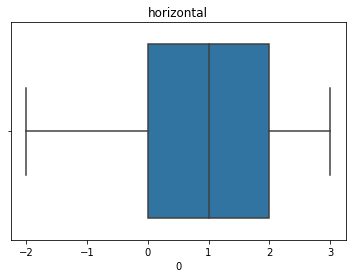

In [180]:
sns.boxplot(x=b[0]).set_title('horizontal')

Text(0.5, 1.0, 'notched plot')

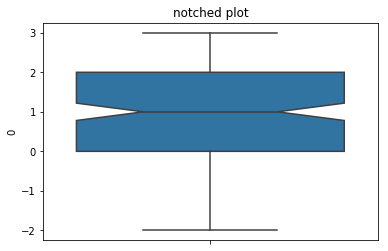

In [182]:
sns.boxplot(y=b[0],notch=True).set_title('notched plot')

Text(0.5, 1.0, 'basic plot')

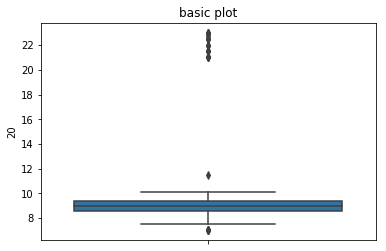

In [183]:
sns.boxplot(y=b[20]).set_title('basic plot')

Text(0.5, 1.0, 'group by fuel-type')

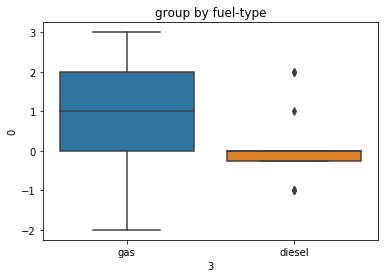

In [184]:
sns.boxplot(y=b[0], x=b[3]).set_title('group by fuel-type')

Text(0.5, 1.0, 'grouped by fuel-type & aspiration')

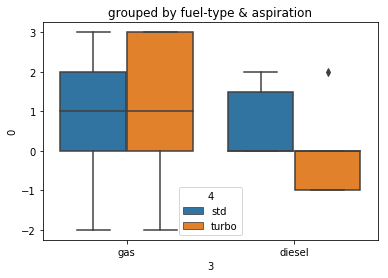

In [194]:
sns.boxplot(y=b[0], x=b[3], hue=b[4]).set_title('grouped by fuel-type & aspiration')

## Exercise 5: Boxplot drive-wheels and Price

[Text(0, 0.5, 'Attribute 10'),
 Text(0.5, 0, 'Attribute 7'),
 Text(0.5, 1.0, 'effect ofrive-wheels to prices')]

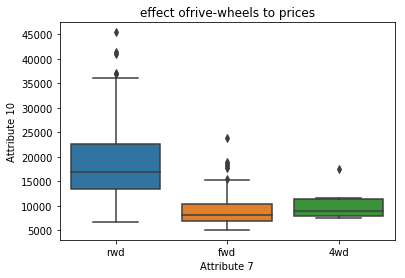

In [202]:
dataprice=b[b[25]!='?'][25]
dataprice2=dataprice.astype('float64')
sns.boxplot(y=dataprice2, x=b[7]).set(xlabel='Attribute 7', ylabel='Attribute 10', title='effect ofrive-wheels to prices')

[Text(0, 0.5, 'Attribute 25'), Text(0.5, 0, 'Attribute16')]

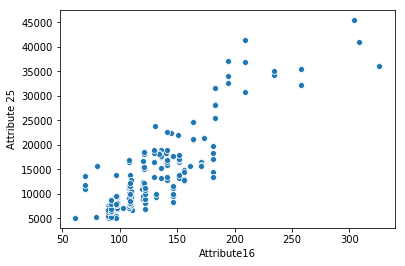

In [203]:
b_price=b[b[25]!='?'][25].astype("int64")
sns.scatterplot(x=b[16],y=b_price).set(xlabel='Attribute16', ylabel='Attribute 25')

In [205]:
b_price_engine=b.iloc[:,[16,25]]
b_price_engine=b_price_engine[b_price_engine[25]!='?']
b_price_engine[25]=b_price_engine[25].astype("int64")
b_price_engine.corr()

,16,25
16,1.000000,0.872335
25,0.872335,1.000000


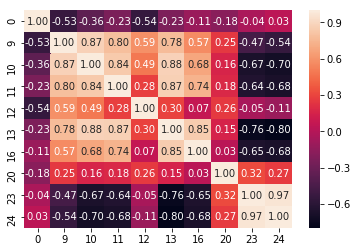

In [223]:
corr = b.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

[Text(33.0, 0.5, 'Attribute 7'), Text(0.5, 15.0, 'Attribute 6')]

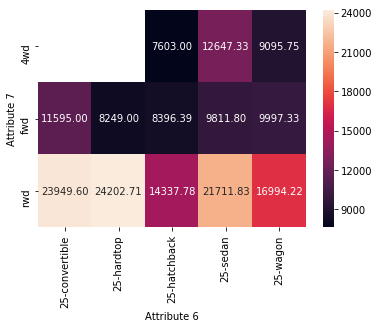

In [207]:
sns.heatmap(b_pivot, annot=True,fmt='.2f').set(xlabel='Attribute 6',ylabel='Attribute 7')

In [210]:
#select body-style(6), drive-wheels(7), price(25) from df
b_3features=b[b.columns[np.r_[6:8,25]]]
#select data where price is not null
b_3features=b_3features[b_3features[25]!='?']
#convert price attribute in object type into float
b_3features[25] = b_3features[25].astype("float64")
#group by body-style(6), drive-wheels(7)
b_grp=b_3features.groupby([b.columns[6],b.columns[7]]).mean()
#create pivot table
b_pivot=b_grp.pivot_table(index=b.columns[7],columns=b.columns[6])
b_pivot

25                                                        
6   convertible       hardtop     hatchback         sedan         wagon
7                                                                      
4wd         NaN           NaN   7603.000000  12647.333333   9095.750000
fwd     11595.0   8249.000000   8396.387755   9811.800000   9997.333333
rwd     23949.6  24202.714286  14337.777778  21711.833333  16994.222222

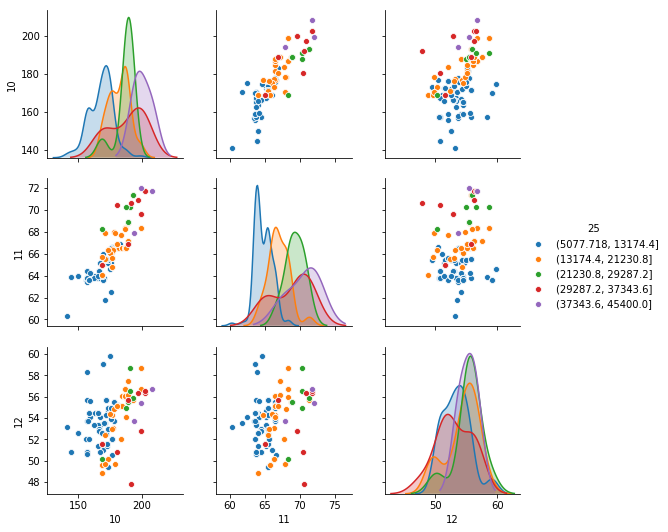

In [212]:
#select length(10),width(11),height(12),price(25) from df
b_4features=b[b.columns[np.r_[10:13,25]]]
#convert price attr. in object type into float
b_4features=b_4features[b_4features[25]!='?']
b_4features[25] = b_4features[25].astype("float64")
b_4features[25] = pd.cut(b_4features[25], 5)
b_4features[25] = b_4features[25].astype("category")
sns.pairplot(data=b_4features,hue=b.columns[25])

## Exercise 5: Data Visualization

### No. 1

In [225]:
df=pd.read_csv("Downloads/winequality-white.csv", sep=';')

### No. 2

In [226]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Text(0.5, 1.0, 'quality')

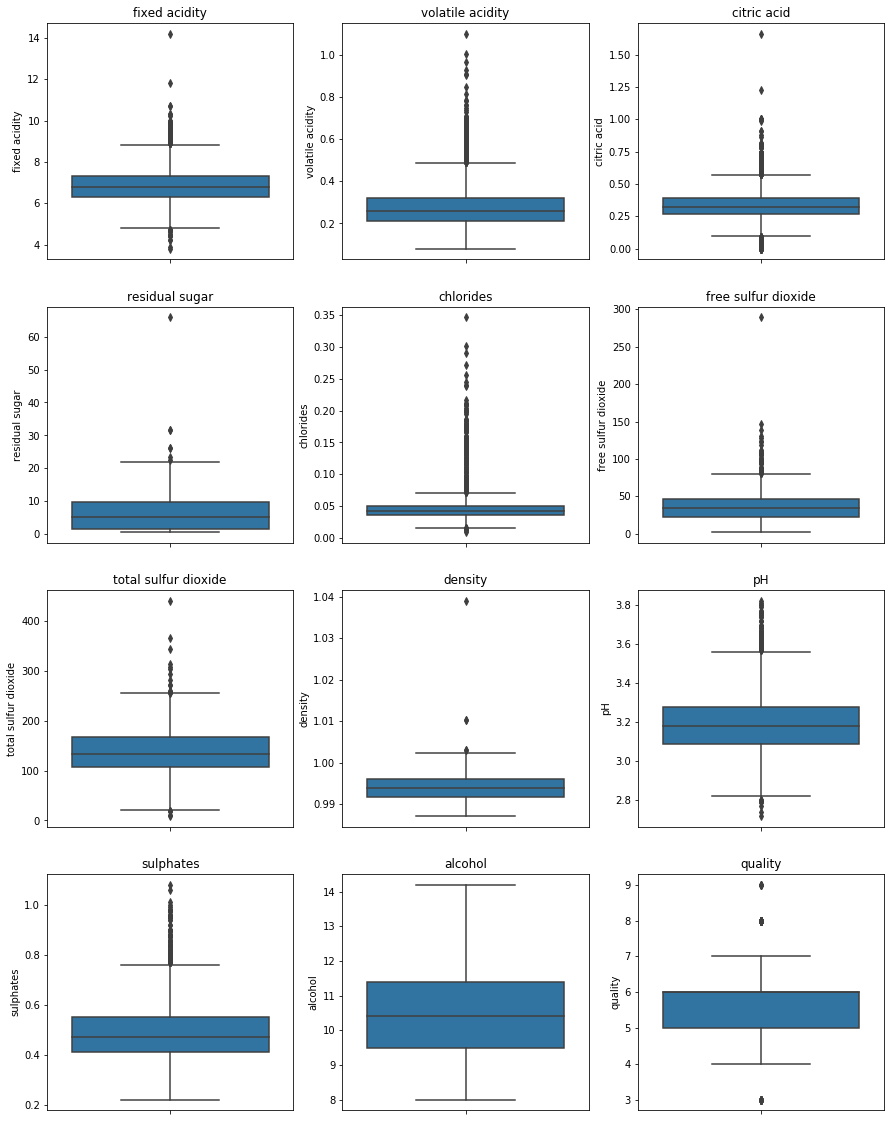

In [258]:
f, axes = plt.subplots(4,3, figsize=(15,20), sharex=True)
sns.boxplot(y=df['fixed acidity'], ax=axes[0][0]).set_title('fixed acidity')
sns.boxplot(y=df['volatile acidity'], ax=axes[0][1]).set_title('volatile acidity')
sns.boxplot(y=df['citric acid'], ax=axes[0][2]).set_title('citric acid')
sns.boxplot(y=df['residual sugar'], ax=axes[1][0]).set_title('residual sugar')
sns.boxplot(y=df['chlorides'], ax=axes[1][1]).set_title('chlorides')
sns.boxplot(y=df['free sulfur dioxide'], ax=axes[1][2]).set_title('free sulfur dioxide')
sns.boxplot(y=df['total sulfur dioxide'], ax=axes[2][0]).set_title('total sulfur dioxide')
sns.boxplot(y=df['density'], ax=axes[2][1]).set_title('density')
sns.boxplot(y=df['pH'], ax=axes[2][2]).set_title('pH')
sns.boxplot(y=df['sulphates'], ax=axes[3][0]).set_title('sulphates')
sns.boxplot(y=df['alcohol'], ax=axes[3][1]).set_title('alcohol')
sns.boxplot(y=df['quality'], ax=axes[3][2]).set_title('quality')

Text(0.5, 1.0, 'quality')

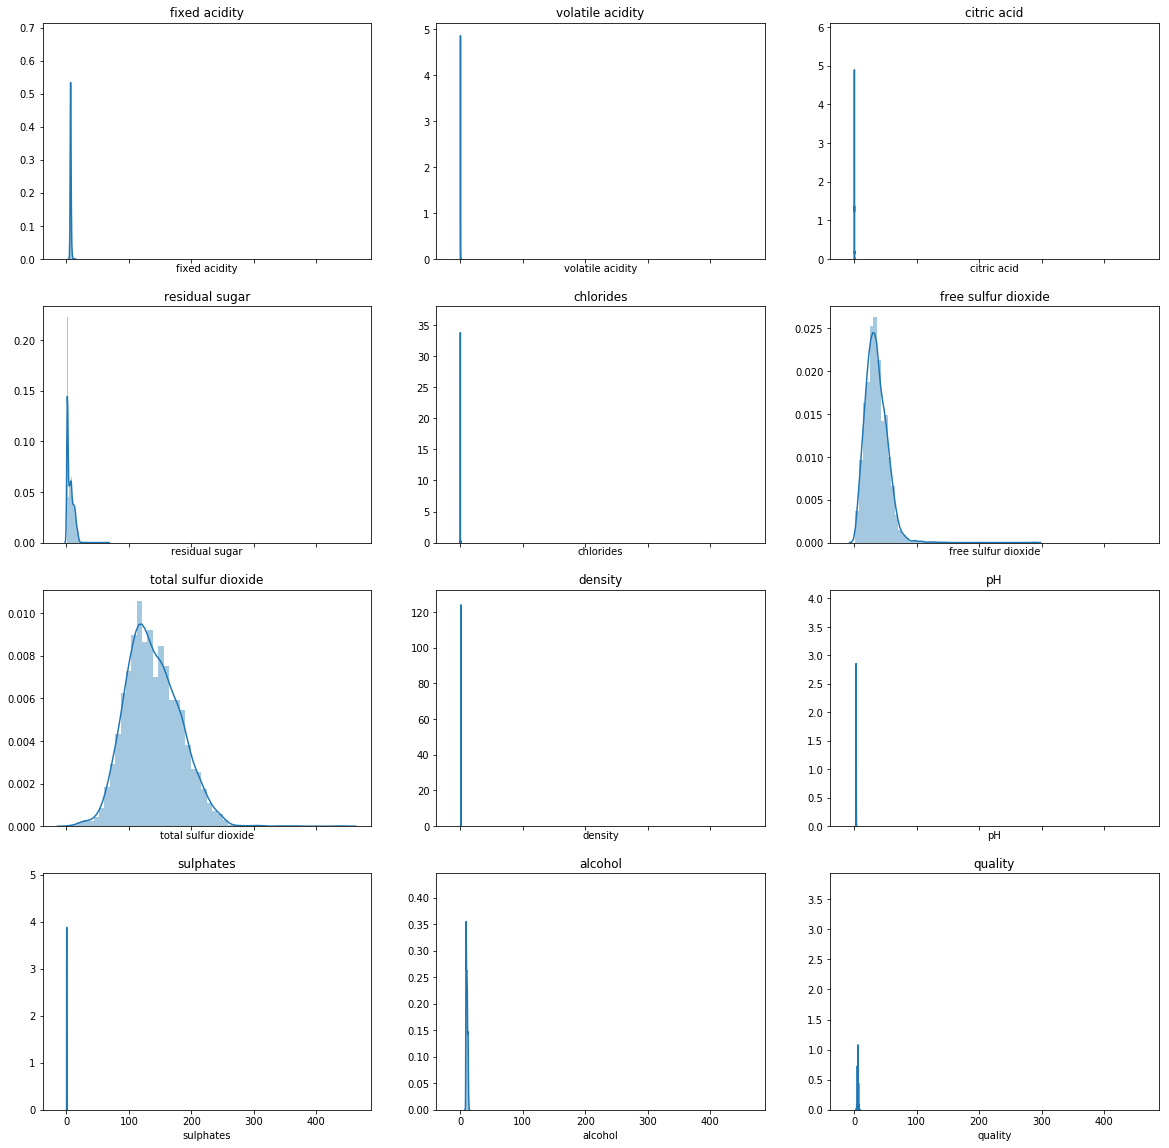

In [278]:
f, axes = plt.subplots(4,3, figsize=(20,20), sharex=True)
sns.distplot(df['fixed acidity'], ax=axes[0][0]).set_title('fixed acidity')
sns.distplot(df['volatile acidity'], ax=axes[0][1]).set_title('volatile acidity')
sns.distplot(df['citric acid'], ax=axes[0][2]).set_title('citric acid')
sns.distplot(df['residual sugar'], ax=axes[1][0]).set_title('residual sugar')
sns.distplot(df['chlorides'], ax=axes[1][1]).set_title('chlorides')
sns.distplot(df['free sulfur dioxide'], ax=axes[1][2]).set_title('free sulfur dioxide')
sns.distplot(df['total sulfur dioxide'], ax=axes[2][0]).set_title('total sulfur dioxide')
sns.distplot(df['density'], ax=axes[2][1]).set_title('density')
sns.distplot(df['pH'], ax=axes[2][2]).set_title('pH')
sns.distplot(df['sulphates'], ax=axes[3][0]).set_title('sulphates')
sns.distplot(df['alcohol'], ax=axes[3][1]).set_title('alcohol')
sns.distplot(df['quality'], ax=axes[3][2]).set_title('quality')

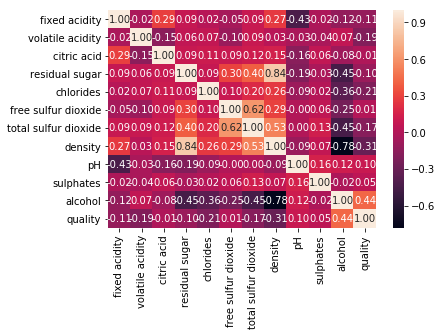

In [279]:
corr = df.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

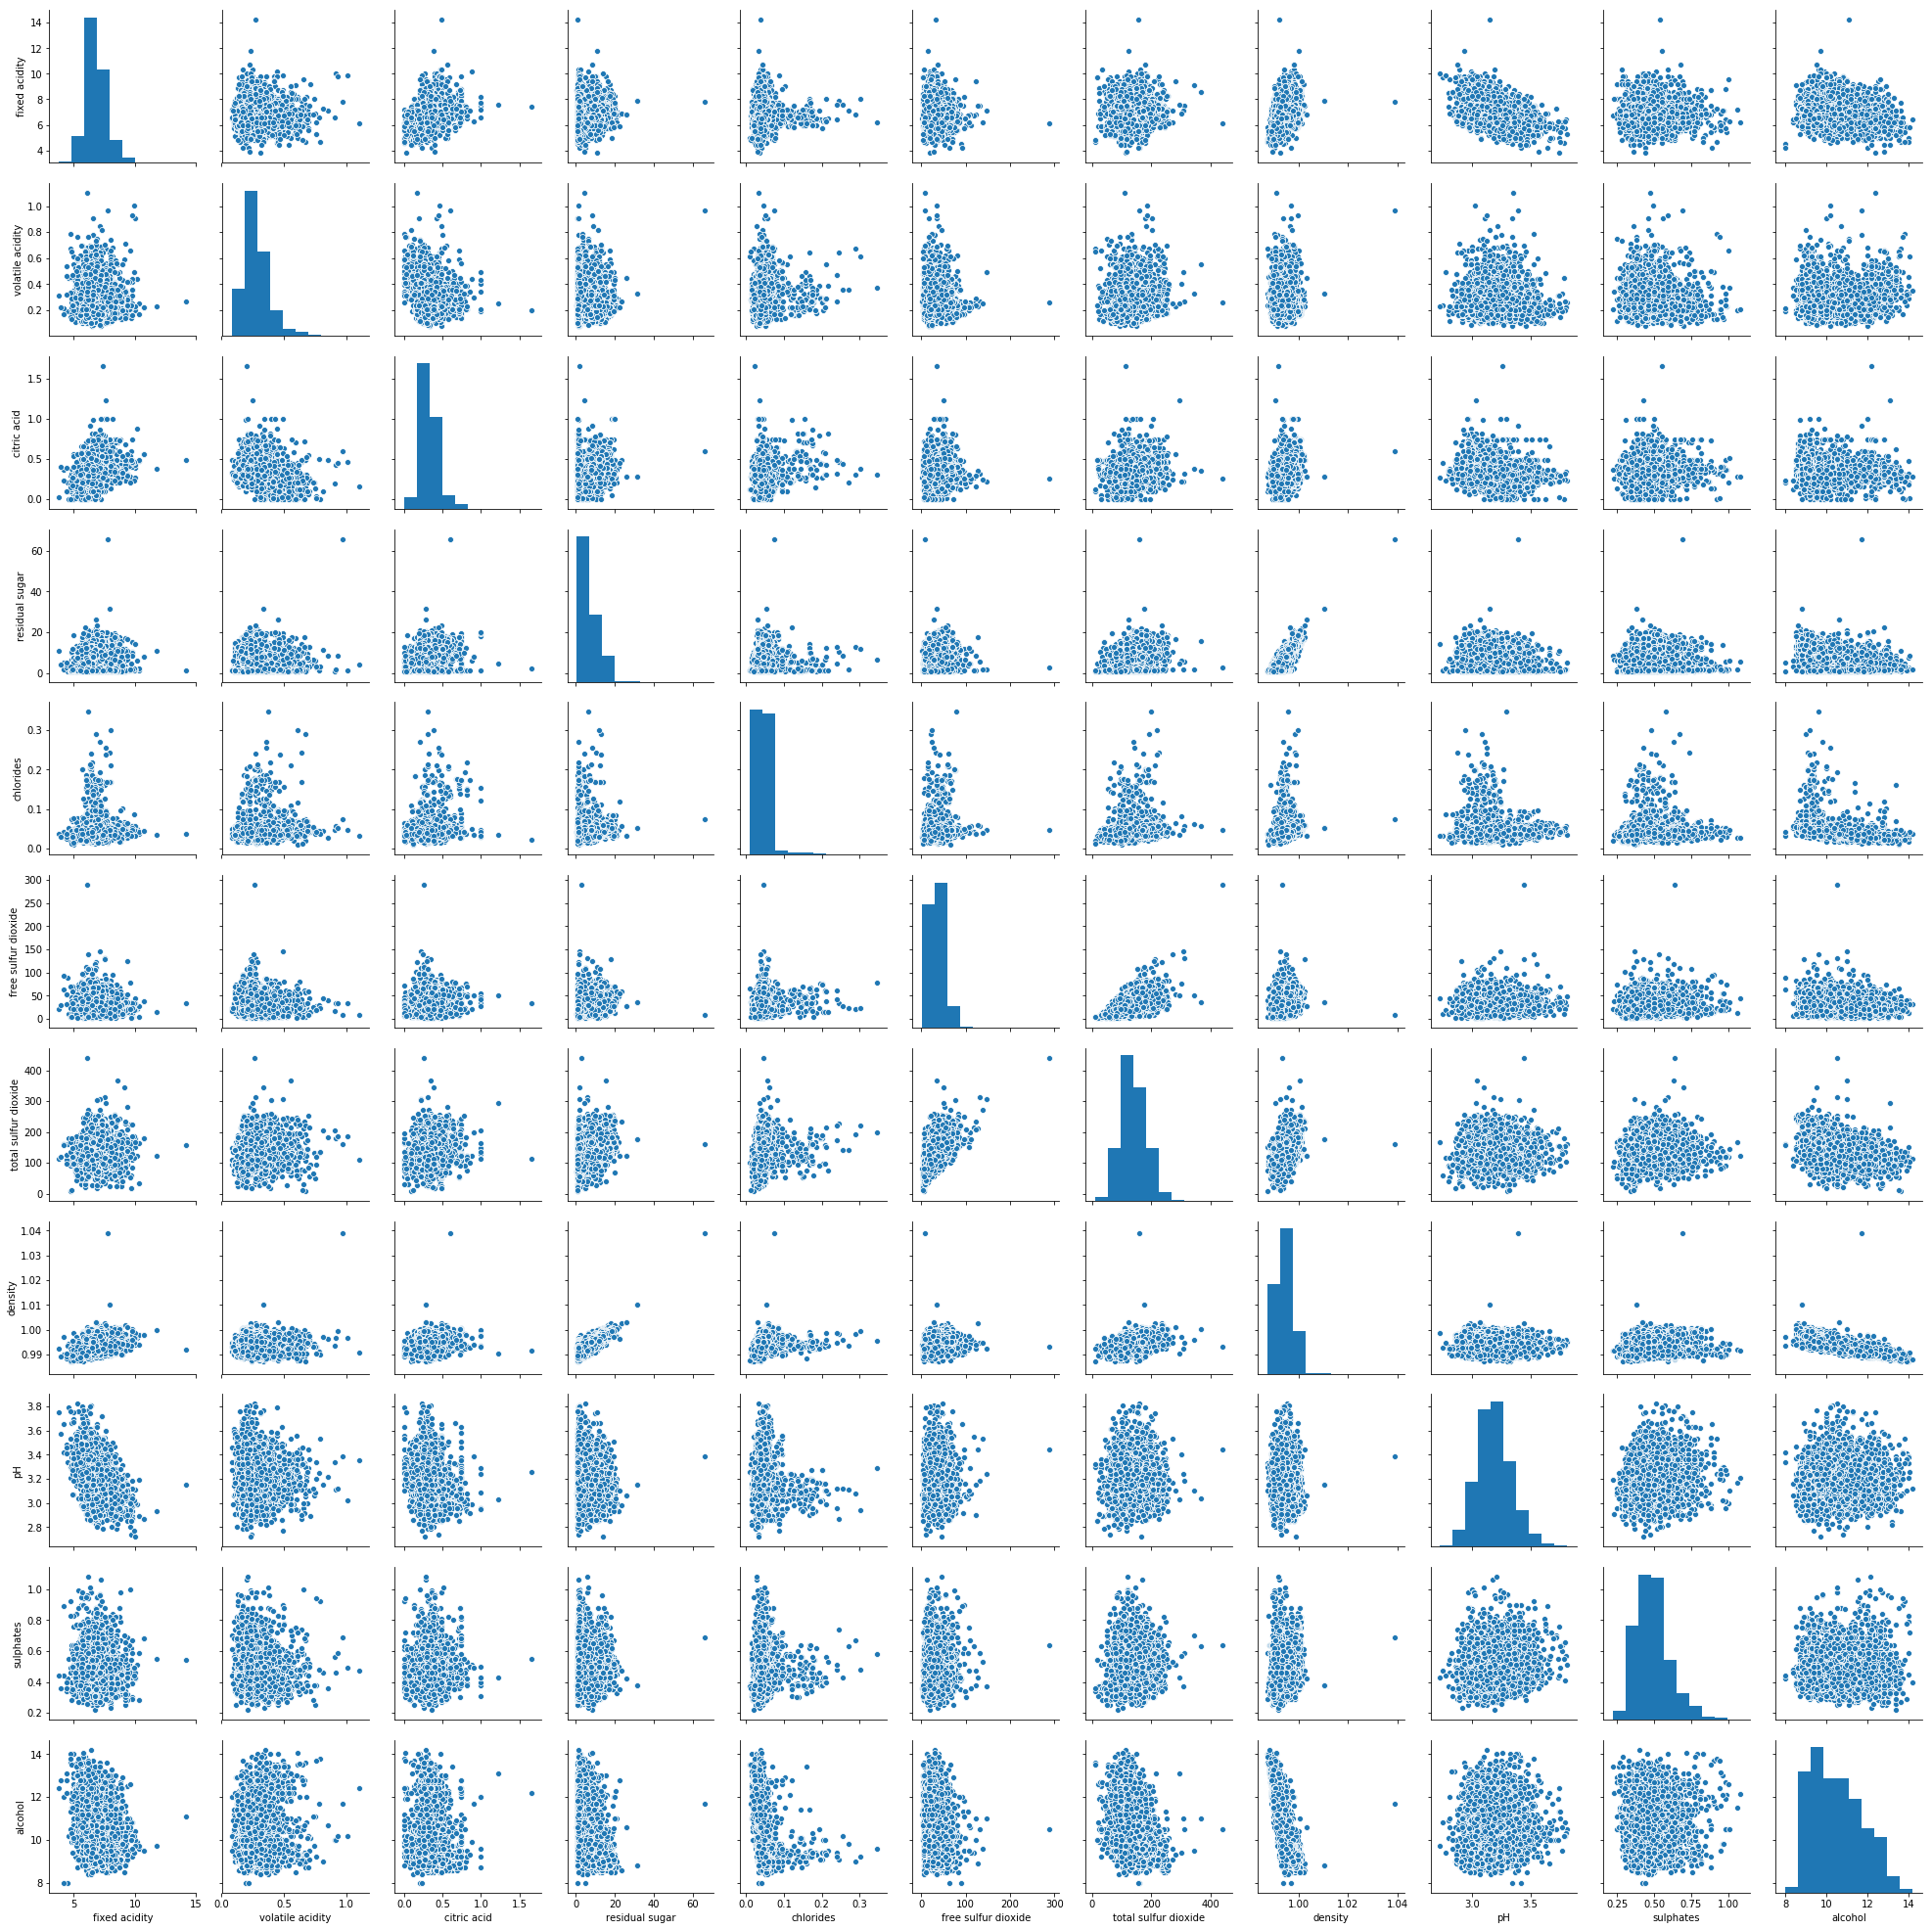

In [288]:
pairplot_df=df[df.columns[np.r_[0:11]]]
sns.pairplot(data=pairplot_df)